<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab4_Primitive_Transformations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task # 1: **Image Negatives**

In [ ]:
from PIL import Image

# Load the image
img = Image.open('img.jpeg');

# Display the original image
img.show()

# Read pixels and apply negative transformation
for i in range(0, img.size[0]-1):
    for j in range(0, img.size[1]-1):
        # Get pixel value at (x,y) position of the image
        pixelColorVals = img.getpixel((i,j));      

        # Invert color
        redPixel    = 255 - pixelColorVals[0]; # Negate red pixel
        greenPixel  = 255 - pixelColorVals[1]; # Negate green pixel
        bluePixel   = 255 - pixelColorVals[2]; # Negate blue pixel

        # Modify the image with the inverted pixel values
        img.putpixel((i,j),(redPixel, greenPixel, bluePixel));

# Display the negative image
img.show();

## Task # 2: **Image Gradients**

In [ ]:
#necessary import
from PIL import Image

#open the image
img = Image.open('img.jpeg').convert('L')
#display the original image
img.show()

# read all the pixels using double for loop and apply the horizontal gradient formula
for x in range(0, img.size[0]-1):
    for y in range(0, img.size[1]-1):
        # I_gradient (x,y)=I(x+1,y)-I(x,y)
        pixel = img.getpixel((x+1,y)) - img.getpixel((x,y))
        img.putpixel((x,y),(pixel));
        
#display the transformed image
img.show()

## Task # 3: **Bit Plane slicing**

In [ ]:
import cv2
import numpy as np

# Read the image in greyscale
img = cv2.imread('img.jpeg',0)
 
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
# Display the images
cv2.imshow('Output1',one_bit_img)
cv2.imshow('Output2',two_bit_img)
cv2.imshow('Output3',three_bit_img)
cv2.imshow('Output4',four_bit_img)
cv2.imshow('Output5',five_bit_img)
cv2.imshow('Output6',six_bit_img)
cv2.imshow('Output7',seven_bit_img)
cv2.imshow('Output8',eight_bit_img)
cv2.waitKey(0) 

-1

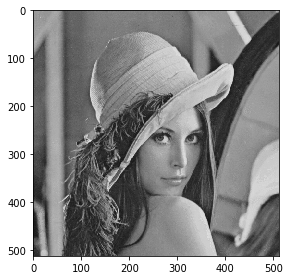

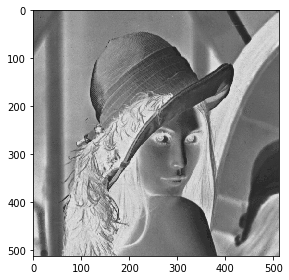

In [ ]:
#necessary imports
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image = imread('image_gs.jpg') #read the input image
imshow(image) #show original image
plt.show() 
negative = 255 - image #vectorized operation to calculate negative
imshow(negative) #show output image


In [ ]:
#necessary imports
import cv2 
import numpy as np

#read input image and convert to grayscale
input = cv2.imread('img.jpeg', 0) 
#a list to store each image after bit plane slicing
images = []

#iterate from 0 to 7
for i in range(0, 8):
    # create an code representing each i bit plane
    plane_code = np.full((input.shape[0], input.shape[1]), 2 ** i, np.uint8)
    # perform bitwise and operation
    result = cv2.bitwise_and(plane_code, input)
    # multiply the result with 255 to enhance the bit plane sliced images
    output = result * 255
    # display the output image
    cv2.imshow("Bit plane " + str(i+1), output)

cv2.waitKey(0)
cv2.destroyAllWindows()
